# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

Data is loadded from super_train.p. It is a set generated from train.p by the program  [new_generate.py](programs/new_generate.py). This program augments train.p data and stores it in super_train.p, that way it is possible to rerun training changing parameters and with the same data.

**new_generate.py** random images images and generates twice as much aplying random transformations so we get a set three times bigger. Initially only geometric transformations were used but finally inclusion of luminance changes got more stable solutions.

The algoritm is:

    * Changed luminance changing the image to LAB and multiplying first channel by a random between 0.5 and 1.5
    * Rotates image around center by a random angle between -20 and 20º
    * Resize the image to a random size between 18x18 and 32x32 and fill the empty borders replicating them to get it once again at a size of 32x32
    * Translate the image a random amount -5 to +5 pixels independently in x and y axes
    


In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
original_training_file = "../traffic-signs-data/train.p"
training_file = "../traffic-signs-data/super_train.p"
validation_file = "../traffic-signs-data/valid.p"
testing_file = "../traffic-signs-data/test.p"

with open(original_training_file, mode='rb') as f:
    original = pickle.load(f)
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_orig, y_orig = original['features'], train['labels']
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results


# TODO: Number of training examples
n_original = X_orig.shape[0]
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
# First line are titles
n_classes = sum(1 for line in open('signnames.csv'))-1

print("Number of original training examples =", n_original)
print("Number of augmented training examples =", n_train)
print("Number of validating examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of original training examples = 34799
Number of augmented training examples = 104354
Number of validating examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

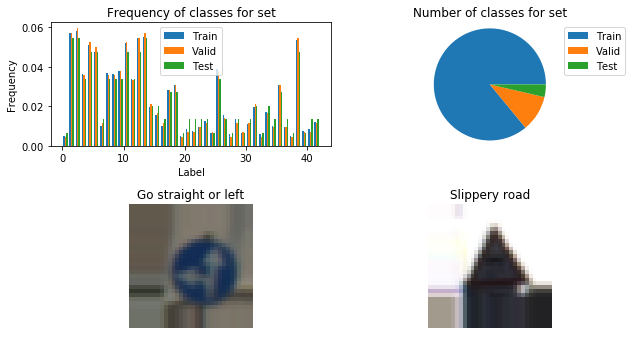

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import random

# Visualizations will be shown in the notebook.

import csv
#read the names
names = []
with open('signnames.csv', 'rt') as f:
    reader = csv.reader(f)
    for idx, row in enumerate(reader):
        if idx > 0:
            names.append(row[1])


fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(9,5)

p0 = plt.subplot(221)

h_train = p0.hist([y_train, y_test, y_valid], 
                  bins=np.arange(y_train.min(), y_train.max()+1), 
                  normed=True, rwidth=0.7,)


p0.set_ylabel("Frequency")
p0.set_xlabel("Label")
p0.legend(('Train', 'Valid', 'Test'))
p0.set_title('Frequency of classes for set')

p1 = plt.subplot(222)
p1.pie([y_train.shape[0],y_test.shape[0],y_valid.shape[0]])
p1.legend(('Train', 'Valid', 'Test'))
p1.set_title('Number of classes for set')
p1.axis('equal') 

p2 = plt.subplot(223)
p2.axis('off')
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
p2.set_title(names[y_train[index]])
plt.imshow(image)

p3 = plt.subplot(224)
p3.axis('off')
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
p3.set_title(names[y_train[index]])
plt.imshow(image)

fig.tight_layout()

plt.show()
            
            
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Normalization

Mean, min and max are computed over the values of the training set and used to normalize all data.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# For the moment just like we did min-max normalization from 0.1-0.9
# Compute stats over X_train.

x_mean = np.mean(X_train)
x_min = np.min(X_train)
x_max = np.max(X_train)

def normalize(image_data):
     return np.array((image_data - x_mean)/(x_max - x_min))




### Preprocessing

Data is preprocessed according to the following steps:

    - Convert image to LAB
    - Apply a equalizeHist to channel 0
    - Apply a clahe to channel 0
    - Reconvert to RGB
    - Apply two Gausian Blur, one with a kernel of 5x5 and subtracting and anoter of 7x7 adding. Subtraction and Adition are weighted. Coeficients found by testing.

In [5]:
### Preprocess data to enhance contrast and edge visibility

import cv2

def process(image_data):
    clahe = cv2.createCLAHE(2.0, (6, 6))

    for idx, x in enumerate(image_data):

        img = cv2.cvtColor(image_data[idx], cv2.COLOR_RGB2LAB)
        channels = cv2.split(img)

        img = cv2.equalizeHist(channels[0])
        img = clahe.apply(img)
        channels[0] = img
        img = cv2.merge(channels)
        img = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)

        aux = cv2.GaussianBlur(img, (5, 5), 0)
        img = cv2.addWeighted(img, 1., aux, -0.9, 0)

        aux = cv2.GaussianBlur(img, (7, 7), 0)
        img = cv2.addWeighted(img, 1., aux, 0.9, 0)

        image_data[idx] = img


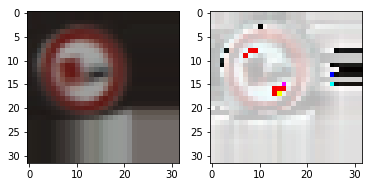

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# For the moment just like we did min-max normalization from 0.1-0.9


index = random.randint(0, len(X_train))
old_image = np.copy(X_train[index].squeeze())

process(X_train)
process(X_valid)
process(X_test)

X_train = normalize(X_train)
X_test = normalize(X_test)
X_valid = normalize(X_valid)

image = X_train[index].squeeze()

fig, axes = plt.subplots(nrows = 1, ncols = 2)

p0 = plt.subplot(1,2,1)
p0.imshow(old_image)
p1 = plt.subplot(1,2,2)
p1.imshow(image)

plt.show()
#print(image)



### Model Architecture

I use 4 Convolution + Max Pooling layers with kernels 5x5 the first one and 3x3 the rest.

Then 3 dense layers applying dropout between them. Best keep prob has been found by testing and is 0.5. The effect of dropout (although in a somewhat simpler architecture) was 0.4 but once upgraded to the last architecture 0.5 give best results:

![Accuracy/Dropout](images/dropout.png)

Last convolution layer has been a test at last moment but as it gave better accuracy I maintained it.

Most of the tests were done with the help of Keras. Here is the [Keras Generated Scheme](images/scheme.png "CNN Layer Scheme").

Keras program used (varying data, etc.) is [TF_newKeras.py](programs/TF_newKeras.py)

After Keras program was moved to raw Tensorflow. Excution doesn't gives the same exact results although I manually fixed the inicialization in Keras. There must be some parameter I have not found that may be different.



In [39]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 60  # Just to test everything works :)
BATCH_SIZE = 256

def f(x):
    return tf.nn.relu(x)

mu = 0
sigma = 0.1
dropout = 0.5
lr = 0.0003
reg = 0.005


f_1 = 60
f_2 = 100
f_21 = 250
f_22 = 250
f_3 = 200
f_4 = 100
f_5 = n_classes

weights = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, 3, f_1], mu, sigma)),
    'wc2': tf.Variable(tf.truncated_normal([3, 3, f_1, f_2], mu, sigma)),
    'wc21': tf.Variable(tf.truncated_normal([3, 3, f_2, f_21], mu, sigma)),
    'wc22': tf.Variable(tf.truncated_normal([3, 3, f_21, f_22], mu, sigma)),
    'wd3': tf.Variable(tf.truncated_normal([f_22*4, f_3], mu, sigma)),
    'wd4': tf.Variable(tf.truncated_normal([f_3, f_4], mu, sigma)),
    'wd5': tf.Variable(tf.truncated_normal([f_4, n_classes], mu, sigma))
}

biases = {
    'bc1': tf.Variable(tf.zeros(f_1)),
    'bc2': tf.Variable(tf.zeros(f_2)),
    'bc21': tf.Variable(tf.zeros(f_21)),
    'bc22': tf.Variable(tf.zeros(f_22)),
    'bc3': tf.Variable(tf.zeros(f_3)),
    'bc4': tf.Variable(tf.zeros(f_4)),
    'bc5': tf.Variable(tf.zeros(n_classes))
}
 

def LeNet(x, dropout, weights, biases):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer



    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x60.

    conv1 = tf.nn.conv2d(x, weights['wc1'], strides=[1, 1, 1, 1], padding='SAME')
    conv1 = tf.nn.bias_add(conv1, biases['bc1']) 
    conv1 = f(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # TODO: Layer 2: Convolutional. Input = 16x16x100.
    conv2 = tf.nn.conv2d(conv1, weights['wc2'], strides=[1, 1, 1, 1], padding='SAME')
    conv2 = tf.nn.bias_add(conv2, biases['bc2']) 
    conv2 = f(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # TODO: Layer 21: Convolutional. Input = 250.
    conv3 = tf.nn.conv2d(conv2, weights['wc21'], strides=[1, 1, 1, 1], padding='SAME')
    conv3 = tf.nn.bias_add(conv3, biases['bc21']) 
    conv3 = f(conv3)
    conv3 = tf.nn.max_pool(conv3, ksize=[1,2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    
      # TODO: Layer 22: Convolutional. Input = 250.
    conv4 = tf.nn.conv2d(conv3, weights['wc22'], strides=[1, 1, 1, 1], padding='SAME')
    conv4 = tf.nn.bias_add(conv4, biases['bc22']) 
    conv4 = f(conv4)
    conv4 = tf.nn.max_pool(conv4, ksize=[1,2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # TODO: Flatten. Input = 52x2x250. Output = 1000.
                                        
    conv4 = flatten(conv4)
    
    # TODO: Layer 3: Fully Connected. Input = 1000. Output = 200.
    
    fc3 = tf.add(tf.matmul(conv4, weights['wd3']), biases['bc3'])
    fc3 = f(fc3)
    fc3 = tf.nn.dropout(fc3, dropout)
    
    # TODO: Layer 4: Fully Connected. Input = 200. Output = 100.
    fc4 = tf.add(tf.matmul(fc3, weights['wd4']), biases['bc4'])
    fc4 = f(fc4)
    fc43 = tf.nn.dropout(fc4, dropout)


    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.add(tf.matmul(fc4, weights['wd5']), biases['bc5'])

   
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
# Features and labels

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)
beta = tf.placeholder(tf.float32)

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


logits = LeNet(x, keep_prob, weights, biases)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss = tf.reduce_mean(cross_entropy)
regularizer = tf.nn.l2_loss(weights['wd5'])
loss_operation = tf.reduce_mean(loss + beta * regularizer)
optimizer = tf.train.AdamOptimizer(learning_rate = lr)
training_operation = optimizer.minimize(loss_operation)


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def probs(X_data):
    sess = tf.get_default_session()
    probs = sess.run(tf.nn.softmax(logits), feed_dict={x: X_data, keep_prob: 1.0, beta:0.0})
    return probs

def predict(X_data):
    sess = tf.get_default_session()
    predicted = sess.run(tf.argmax(logits, 1), feed_dict={x: X_data, keep_prob: 1.0, beta:0.0})
    return predicted

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0.0
    total_loss = 0.0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0, beta:0.0})
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0, beta:0.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_accuracy / num_examples,  total_loss / num_examples


In [8]:

from sklearn.utils import shuffle

history = []

op = "Run"  # User Train to retrain the network

if op == "Train":
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout, beta:reg})

            training_accuracy, training_loss = evaluate(X_train, y_train)
            validation_accuracy, validation_loss = evaluate(X_valid, y_valid)

            history.append([training_loss, training_accuracy, validation_loss, validation_accuracy])
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()

        saver.save(sess, './lenet')
        print("Model saved")    
        print("epoch, loss, accuracy, val_loss, val_accuracy")

        for i, epoch_data in enumerate(history):
            print(i, epoch_data[0], epoch_data[1], epoch_data[2], epoch_data[3])

        test_accuracy, test_loss = evaluate(X_test, y_test)

        print("Test Loss", test_loss, "Test Accuracy", test_accuracy)
    
        


Training...

EPOCH 1 ...
Validation Accuracy = 0.511

EPOCH 2 ...
Validation Accuracy = 0.747

EPOCH 3 ...
Validation Accuracy = 0.824

EPOCH 4 ...
Validation Accuracy = 0.884

EPOCH 5 ...
Validation Accuracy = 0.923

EPOCH 6 ...
Validation Accuracy = 0.945

EPOCH 7 ...
Validation Accuracy = 0.953

EPOCH 8 ...
Validation Accuracy = 0.968

EPOCH 9 ...
Validation Accuracy = 0.968

EPOCH 10 ...
Validation Accuracy = 0.961

EPOCH 11 ...
Validation Accuracy = 0.971

EPOCH 12 ...
Validation Accuracy = 0.976

EPOCH 13 ...
Validation Accuracy = 0.980

EPOCH 14 ...
Validation Accuracy = 0.975

EPOCH 15 ...
Validation Accuracy = 0.977

EPOCH 16 ...
Validation Accuracy = 0.980

EPOCH 17 ...
Validation Accuracy = 0.978

EPOCH 18 ...
Validation Accuracy = 0.978

EPOCH 19 ...
Validation Accuracy = 0.977

EPOCH 20 ...
Validation Accuracy = 0.981

EPOCH 21 ...
Validation Accuracy = 0.981

EPOCH 22 ...
Validation Accuracy = 0.976

EPOCH 23 ...
Validation Accuracy = 0.975

EPOCH 24 ...
Validation Accura

### Convergence

I plot the Loss and Accuracy either from the train set and the validation set.
    
There are some curious observations:

    - Loss and accuracy get better faster in the validation set than in the training set
    
    - The validation loss stabilizes before the training loss
    
This behaviour has been observed in many runs with different models. Probably has something to do with the frequency of different classes in the two sets.

Test Loss and Test Accuracy is measured againt the test loss. In the actual runt they are at 0.2370 and 0.966 respectively. 

They are worst than the training and validation values.

In different runs with the same architecture based in Keras (explained in the report) I have arrived at the following data :

    - Trainning Loss : 0.0314, Training Accuracy : 0.9949
    - Validation Loss : 0.0621, Validation Accuracy : 0.9889
    - Test Loss : 0.1651, test Accuracy : 0.9724

    
    
    


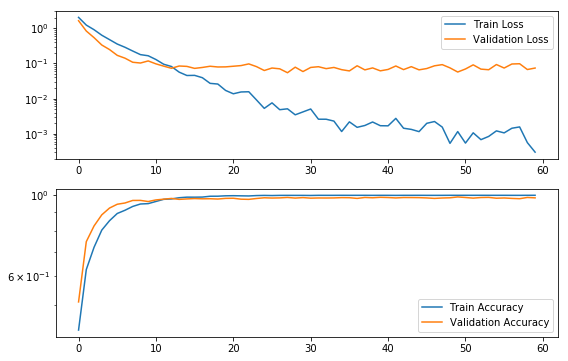

In [9]:
# history is copy pasted from last cell so no need to retrain it if we get out of the notebook
# values ar training_loss, training_accuracy, validation_loss, validation_accuracy
history = np.array([[2.0198597825816171, 0.42791843148594921, 1.6243338124281694, 0.51088435379555974], [1.2207755232916491, 0.62641585373550857, 0.82813313258748478, 0.74671201814058952], [0.90297550454895403, 0.72055695038843226, 0.5380898124101211, 0.82426303881906871], [0.62979647006857287, 0.80302623756515323, 0.33237285508928388, 0.88412698439729998], [0.47239462429984969, 0.85198459093340917, 0.24680016015966733, 0.9226757372317671], [0.35377776674006828, 0.89165724361194387, 0.16901919934518483, 0.94512471682360388], [0.28650728011902604, 0.90995074457409153, 0.14054714632885798, 0.95260771002088274], [0.22422427185188074, 0.93215401421968291, 0.10764590275395755, 0.96802721115466961], [0.17717227409913711, 0.9465952431776119, 0.10242610309196978, 0.96825396852428414], [0.16462272801935818, 0.9487896966781586, 0.11737465065188048, 0.96145124716553287], [0.12865198986426282, 0.96181267610617882, 0.096932495519721593, 0.97120181432927277], [0.094637749295003515, 0.97481649004718729, 0.083546152612925112, 0.97573696172156299], [0.081666913582284256, 0.97715468502018177, 0.072621971787779238, 0.98027210911385332], [0.056480269503196588, 0.98467715663012656, 0.08429644733092953, 0.97460317487349046], [0.045328783884884115, 0.98827069400107459, 0.0821990304497702, 0.97732426330886457], [0.045715788711486911, 0.98809820419529726, 0.072190397547013091, 0.97959183700500974], [0.039259390081968763, 0.98878816337842435, 0.076662216835619371, 0.97800453541770815], [0.027125407424134863, 0.99395327443697457, 0.082964837716685405, 0.97845805015693721], [0.02594154332948562, 0.99421200913421715, 0.079109370995676165, 0.97664399068642094], [0.017088082709632264, 0.99667478007551225, 0.07961702436766252, 0.98072562385308226], [0.013733217027886177, 0.99745098415010447, 0.082999656830920657, 0.98140589544832568], [0.015460830985323018, 0.99651187304751132, 0.086638002709196263, 0.97573696172156299], [0.015676444696191189, 0.99574525173927209, 0.096721546554646529, 0.97460317487349046], [0.0091506910070126221, 0.9982176054583437, 0.080848477738582086, 0.98004535123063863], [0.0052956261026051166, 0.99921421315905479, 0.062844646711413515, 0.98435374176691448], [0.0075911432227632903, 0.99837092972570329, 0.073865105240561418, 0.98276643990929702], [0.0048553145211272094, 0.99934837188799663, 0.070098665895974244, 0.9836734696580709], [0.0051437401143086077, 0.99947294785629726, 0.054360957449785689, 0.98639455809344512], [0.0034755947193191665, 0.99936753742070261, 0.078016586327617002, 0.98253968280999837], [0.0042029579754273459, 0.99935795465434962, 0.058657306048368649, 0.98548752834467124], [0.0050812927461122972, 0.9988404852712881, 0.076772337830931695, 0.98208616807076932], [0.0026076329793350301, 0.99972209977576332, 0.08046211848149494, 0.98321995464852607], [0.0026032588215121649, 0.99964543764493929, 0.070986709933804001, 0.98299319754922743], [0.0023053841287174015, 0.99966460317764527, 0.076755824989888422, 0.98344671228845648], [0.0011666843694181667, 0.99984667573835218, 0.066353750442389114, 0.98526077124537259], [0.0021940628169615927, 0.99967418594399826, 0.06114776774073049, 0.98480725650614354], [0.0015342325265737887, 0.99979876190658723, 0.085587657275535758, 0.98049886648346773], [0.0017307180145648207, 0.99978917914023424, 0.065459114413015759, 0.98639455782312924], [0.0021738411210130487, 0.99953044444870343, 0.074408887733247067, 0.98435374176691448], [0.0017048197178774855, 0.99975084807482228, 0.061469643323390812, 0.98730158757190312], [0.0016915893632915597, 0.99969335147670435, 0.067328041621067827, 0.98594104308390018], [0.0027546396184903316, 0.99933878912164364, 0.08440275353231487, 0.9834467120181406], [0.001446815499445463, 0.99976043084117527, 0.066623678501978381, 0.98594104308390018], [0.0013411668935865947, 0.99971251700941033, 0.080745274297625902, 0.98571428598460153], [0.0011589263386269984, 0.99981792743929321, 0.065593184101186239, 0.98526077124537259], [0.0019940046712240206, 0.99959752381317435, 0.07147599859912869, 0.98344671228845648], [0.0022433821180443164, 0.99952086168235044, 0.085378965121518727, 0.98049886624018356], [0.0015591606174257303, 0.99962627211223332, 0.09219735083314104, 0.98299319703562726], [0.00053849759951887929, 0.99992333786917609, 0.074585731256615412, 0.9843537414965986], [0.0011623607965615763, 0.99980834467294022, 0.056894556787144814, 0.98956916126804828], [0.00054825781330864831, 0.99992333786917609, 0.069372749480111587, 0.98616780021023043], [0.0010717023074885595, 0.9998275102056462, 0.090913736414025767, 0.98231292517006807], [0.00068601066312796088, 0.99993292063552908, 0.068769189988804699, 0.98594104335421606], [0.00084704625055457335, 0.99980834467294022, 0.066029140349378401, 0.98684807283267417], [0.0012167930313219525, 0.99977001360752826, 0.092771880050683958, 0.98163265333154037], [0.0010675265813254009, 0.99985625850470516, 0.073833820029624367, 0.98321995491884195], [0.0014458611425129566, 0.99965502041129228, 0.096072027052923864, 0.98049886648346773], [0.0015750818570689211, 0.99959752381317435, 0.097706331120029966, 0.97868480752655163], [0.00056482103497847256, 0.99988500680376413, 0.066938465245064124, 0.98639455809344512], [0.00030308377559971493, 0.99998083446729402, 0.073793229862908205, 0.98390022702768543]])

fig, axes = plt.subplots(nrows = 2, ncols = 1)
fig.set_size_inches(9,6)

plt.subplot(2,1,1)
epochs = list(range(0, history.shape[0]))
plt.plot(epochs, history[:,0], epochs, history[:,2])
plt.legend(('Train Loss', 'Validation Loss'))
plt.yscale('log')

plt.subplot(2,1,2)
epochs = list(range(0, history.shape[0]))
plt.plot(epochs, history[:,1], epochs, history[:,3])
plt.legend(('Train Accuracy', 'Validation Accuracy'))
plt.yscale('log')

plt.show()


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

I have selected the images with different sizes. Manually selected the signal and saved it to files prefixed wit <correct class_>. That's good for automatic testing without having to enter a different file or array with the correct classes..

When loaded they are first resized to 28x28 and added a replicating border. Resizing with OpenCV is quite bad  and pixelizes a lot.

I included 8 images to get a better set. Results have 1 misled signals, one confusing General Caution with Traffic Signals.

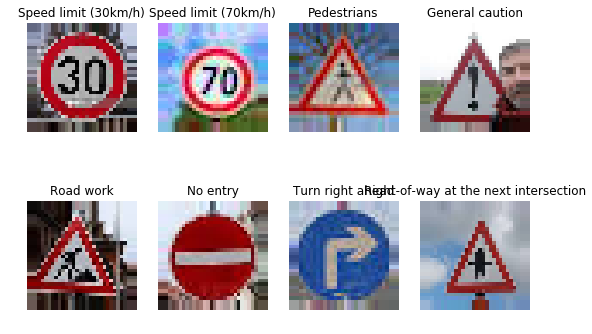

In [75]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os

def get_images(path):

    images = []
    labels = []
    for file in os.listdir(path):
        if file[0] != ".":
            raw_image = plt.imread(path+"/"+file)
            img = cv2.resize(raw_image, (28, 28), interpolation=cv2.INTER_CUBIC)
            img = cv2.copyMakeBorder(img, 2, 2, 2, 2, cv2.BORDER_REPLICATE);
            images.append(img)  # the 1th column is the filename
            label = int(file.split("_")[0])
            labels.append(label)

    return np.array(images), np.array(labels)

X_web, y_web = get_images("images/german_web")

nimg = X_web.shape[0]

plt.show()  # clear half executed code

fig, axes = plt.subplots(nrows=2, ncols=int((nimg+1)/2))

for i, img in enumerate(X_web):
    axes[int(i/4), int(i%4)].imshow(img)
    axes[int(i/4), int(i%4)].axis('off')
    axes[int(i/4), int(i%4)].set_title(names[y_web[i]])
    
fig.set_size_inches(9,6)
plt.show()



### Predict the Sign Type for Each Image

Test Accuracy = 0.875 Test Loss = 0.836
[ 1  4 27 26 25 17 33 11]
Errors are surrounded by *


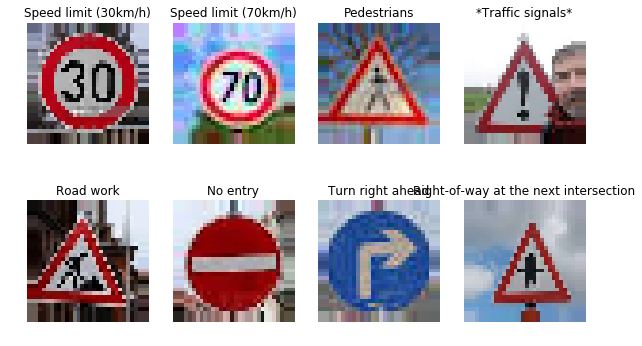

In [76]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Create a new session

# Load the model
# Be careful not to retrain it


with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./lenet.meta')
    new_saver.restore(sess, './lenet')
    
    #prediction = tf.argmax(logits)
    
    # Preprocess and normalize the images
    orig_images = np.copy(X_web)
    
    process(X_web)
    X_web = normalize(X_web)
    web_accuracy, web_loss = evaluate(X_web, y_web)
    
    print("Test Accuracy = {:.3f} Test Loss = {:.3f}".format(web_accuracy, web_loss))
    predictions = predict(X_web)
    print(predictions)

    
    nimg = X_web.shape[0]
    fig, axes = plt.subplots(nrows=2, ncols=int((nimg+1)/2))
    
    i = 0
    
    print("Errors are surrounded by *")
    
    for (image, predicted, correct) in zip(orig_images, predictions, y_web):
        axes[int(i/4), int(i%4)].imshow(image)
        axes[int(i/4), int(i%4)].axis('off')
        
        if predicted == correct:
            title = names[predicted]
        else:
            title = "*" +names[predicted] + "*"
            
        axes[int(i/4), int(i%4)].set_title(title)
        i = i + 1
    
    fig.set_size_inches(10,6)
    plt.show()
 

### Analyze Performance

In [77]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print("Test Accuracy = {:.1f}% Test Loss = {:.3f}".format(web_accuracy*100, web_loss))



Test Accuracy = 87.5% Test Loss = 0.836


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [79]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./lenet.meta')
    new_saver.restore(sess, './lenet')

    probabilities = probs(X_web)
    
    (t0, t1)= sess.run(tf.nn.top_k(tf.constant(probabilities), k=5))
    
    
    for (correct, indices, prob) in zip(y_web, t1, t0):
        print()
        print(str(correct), names[correct],":")

        for (i, p) in zip(indices, prob):
            print("     " , names[i] , "(", str(p) , ")")
     
     


1 Speed limit (30km/h) :
      Speed limit (30km/h) ( 0.790835 )
      Stop ( 0.183212 )
      Speed limit (50km/h) ( 0.0208328 )
      Speed limit (100km/h) ( 0.0037324 )
      No vehicles ( 0.000538524 )

4 Speed limit (70km/h) :
      Speed limit (70km/h) ( 0.99988 )
      Speed limit (30km/h) ( 0.000119784 )
      Speed limit (20km/h) ( 1.81301e-09 )
      Stop ( 4.11903e-12 )
      Road narrows on the right ( 2.18751e-12 )

27 Pedestrians :
      Pedestrians ( 0.97304 )
      Road work ( 0.022748 )
      Road narrows on the right ( 0.00271658 )
      Right-of-way at the next intersection ( 0.000875105 )
      Children crossing ( 0.000385824 )

18 General caution :
      Traffic signals ( 0.884633 )
      Bumpy road ( 0.111916 )
      General caution ( 0.00258766 )
      Road work ( 0.000593272 )
      No vehicles ( 0.000257958 )

25 Road work :
      Road work ( 0.627069 )
      Children crossing ( 0.286815 )
      Pedestrians ( 0.0643346 )
      Road narrows on the right ( 0.014

The CNN is fairly certain in its predictions, unfortunately it is equally confident in the erroneous predictions (General Caution interpreted as Traffic Signals with an 88% certainty). 

### Confusion Maps

I have computed the confusion maps for every signal. Curiously there is very few dispersion in the erroneous recognition. Cnn was really sure it was Traffic Signals and not General Caution.

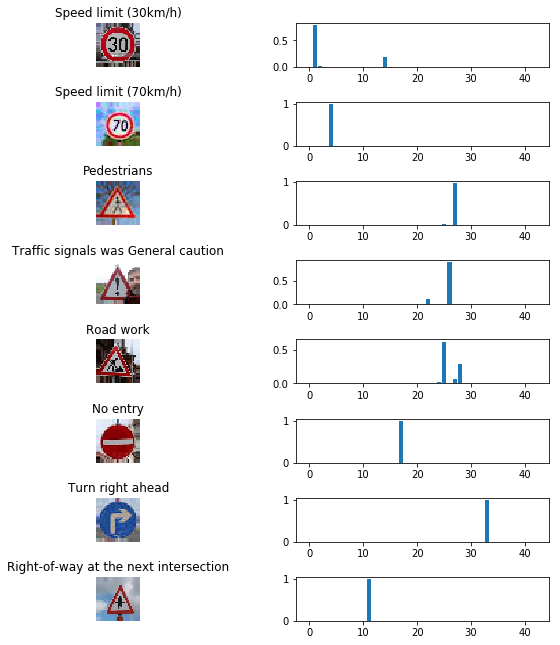

In [80]:
    nimg = X_web.shape[0]
    fig, axes = plt.subplots(nrows=nimg, ncols=2)

    i = 0
    for (image, prob, idx, correct) in zip(orig_images, probabilities, predictions, y_web):

        axes[i,0].imshow(image)
        axes[i,0].axis('off')
        if correct == idx:
            title = names[idx]
        else:
            title = names[idx] + " was " + names[correct]
        axes[i, 0].set_title(title)
        axes[i,1].bar(left=list(range(0,43)), height=prob)
        i = i+1
    
    fig.set_size_inches(10,11)
    fig.subplots_adjust(hspace=0.8)
    plt.show()     


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [81]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    rows = int(featuremaps/8)+1
    for featuremap in range(featuremaps):
        plt.subplot(rows,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.axis('off')
        #plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

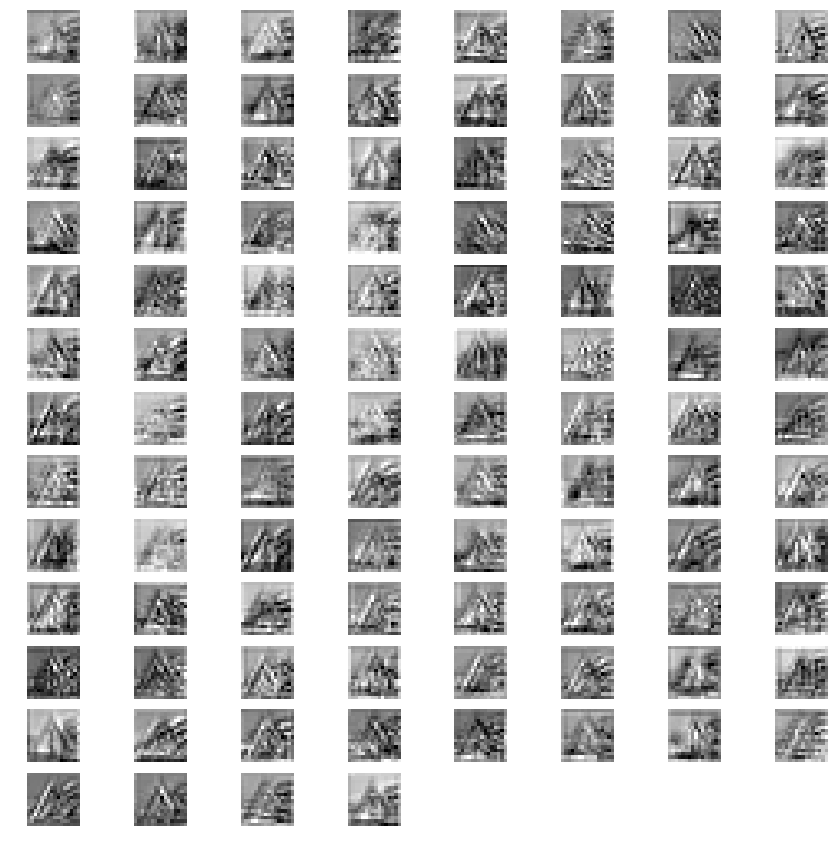

In [83]:
# Abit convoluted but need to get the layer which unfortunately is in a procedure so it is local
image = 3
layer = "Conv2D_1"
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./lenet.meta')
    new_saver.restore(sess, './lenet')

    ops = sess.graph.get_operations()
    for op in ops:
        if op.name == layer:
            print
            outputFeatureMap(X_web[image].reshape(1,32,32,3), op.values()[0])

    plt.show()